# DIWALI SALES ANALYSIS

## Loading Dataset

In [1]:
#Importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
#checking number of rows and columns
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#Checking nulls and not nulls in all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Data Cleaning

In [6]:
#Dropping unnecessary columns
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [7]:
#Checking nulls
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#Dropping null values
df.dropna(inplace=True)

In [9]:
#Checking data types of columns
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [10]:
#Changing datatype of Amount from float to int
df=df.astype({'Amount':'int'})

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [12]:
#statistical summary of dataframe
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Plotting a bar chart for Gender and it's count

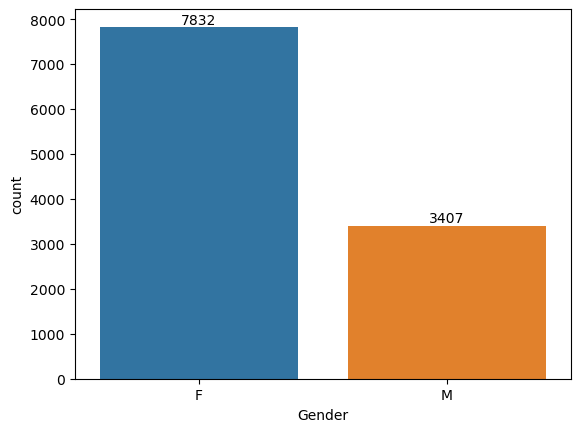

In [14]:
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

### Plotting a bar chart for gender vs total sales

In [23]:
sales_gen = df.groupby('Gender')['Amount'].sum().reset_index()

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

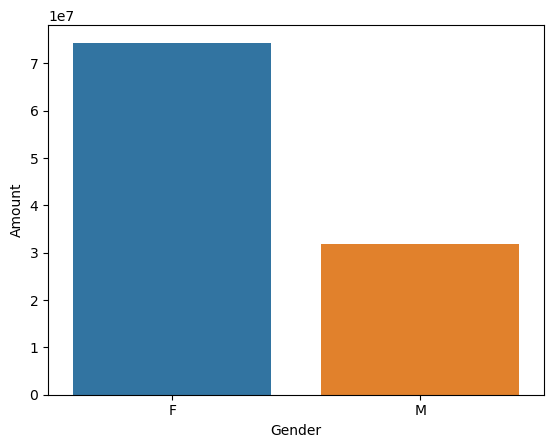

In [24]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above graphs we can see that most of the buyers are females and the females purchased products more than males

### Plotting a bar chart for age and it's count for males and females

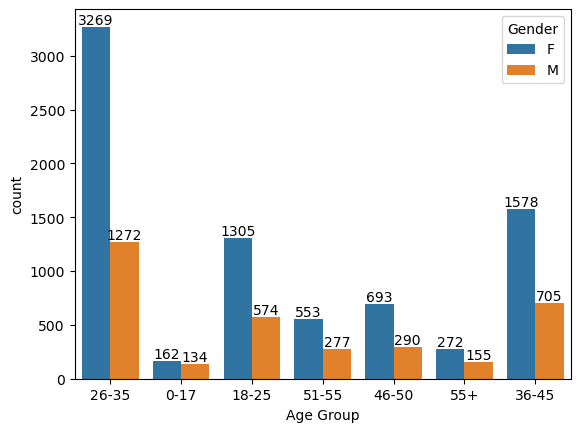

In [22]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

### Age group vs sales

In [28]:
sales_age = df.groupby(['Age Group'])['Amount'].sum().reset_index().sort_values('Amount', ascending=False)

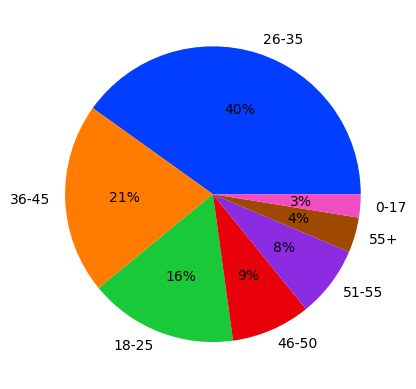

In [30]:
palette_color = sns.color_palette('bright')
  # plotting data on chart
plt.pie(sales_age['Amount'], labels=sales_age['Age Group'], colors=palette_color, autopct='%.0f%%')
  # displaying chart
plt.show()

From above graphs we can see that 40% of the buyers are of age group between 26-35 yrs and are females more than males

### Total number of orders from top 10 states

In [41]:
orders_state = df.groupby(['State'])['Orders'].sum().reset_index().sort_values('Orders', ascending=False).head(10)

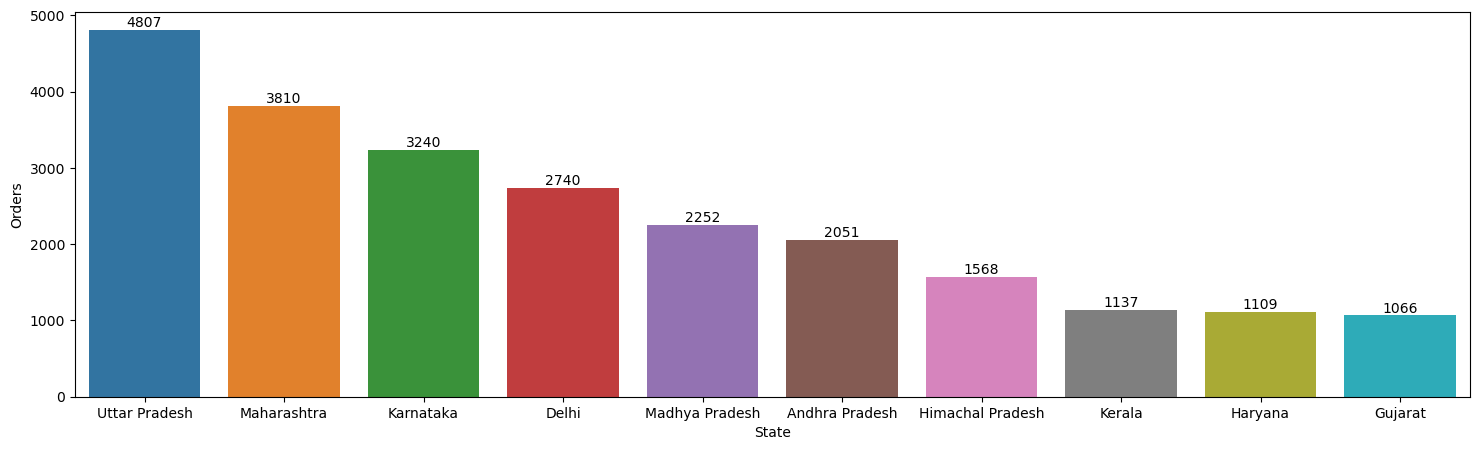

In [42]:
plt.figure(figsize=(18,5))
ax=sns.barplot(data = orders_state, x = 'State',y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### total sales from top 10 states

In [40]:
sales_state = df.groupby(['State'])['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(10)

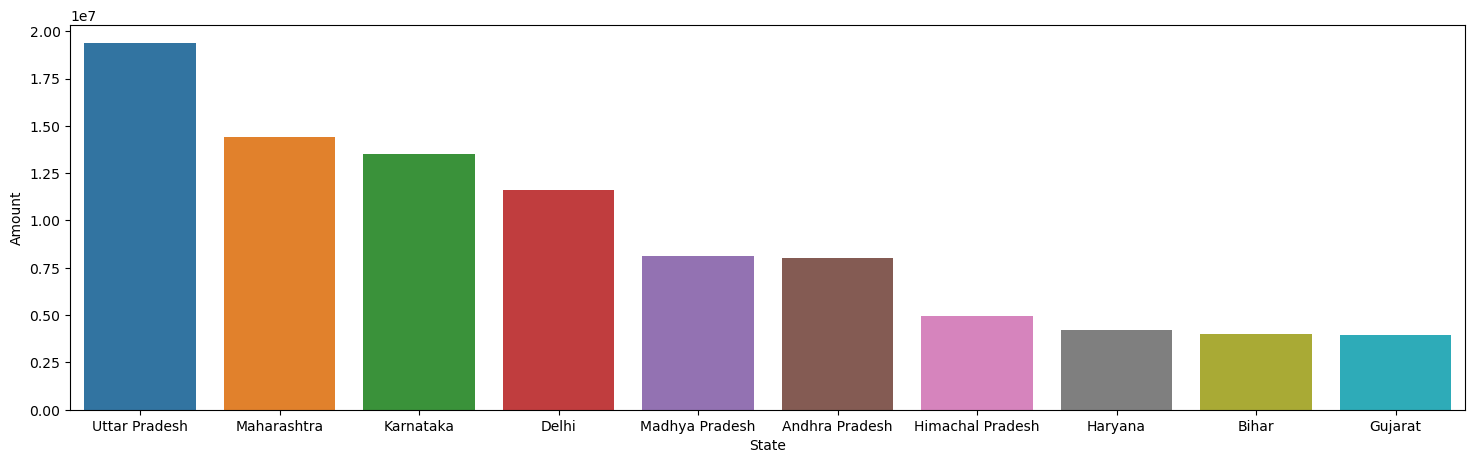

In [44]:
plt.figure(figsize=(18,5))
ax=sns.barplot(data = sales_state, x = 'State',y='Amount')
plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Married and Not Married

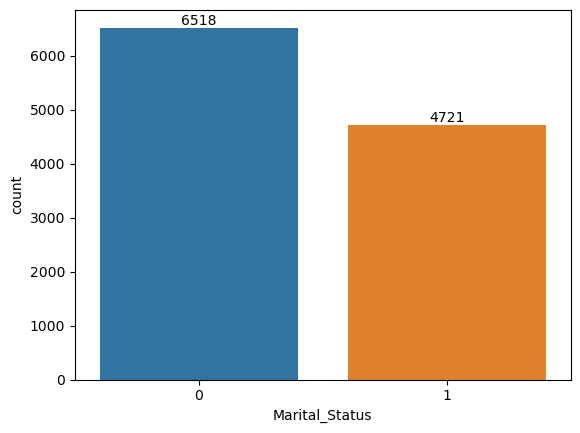

In [45]:
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

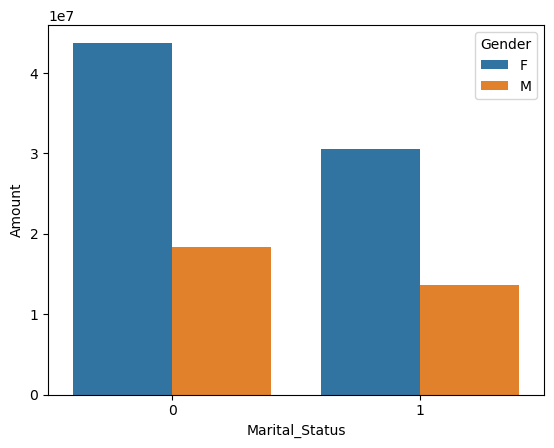

In [46]:
status_gender = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index().sort_values('Amount', ascending=False)
sns.barplot(data = status_gender, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### The occupation count with males and females

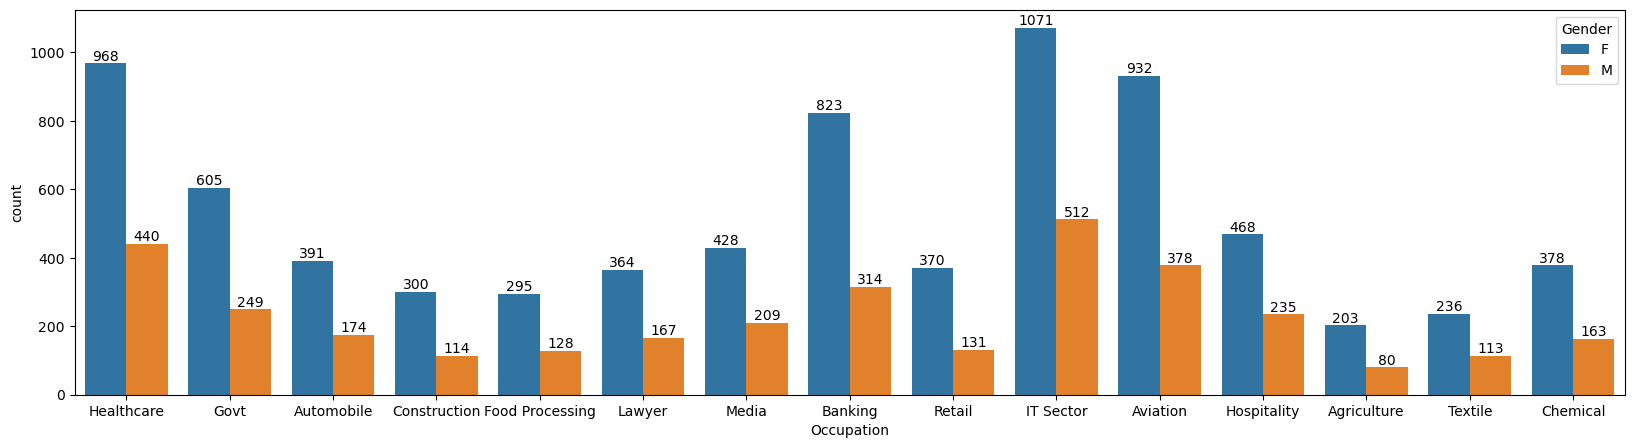

In [56]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Occupation',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Occupation vs Sales generated

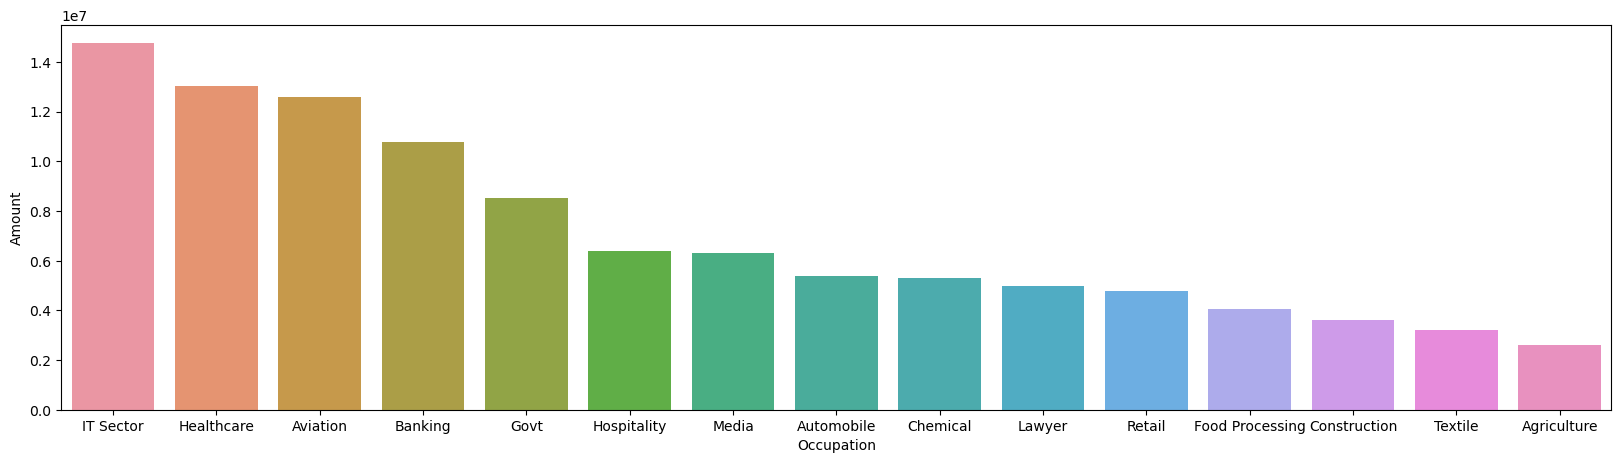

In [57]:
plt.figure(figsize=(20,5))
occ_amount = df.groupby(['Occupation'])['Amount'].sum().reset_index().sort_values('Amount', ascending=False)
sns.barplot(data = occ_amount, x = 'Occupation',y= 'Amount')
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector and most of them are females

### Product Category vs Sales generated

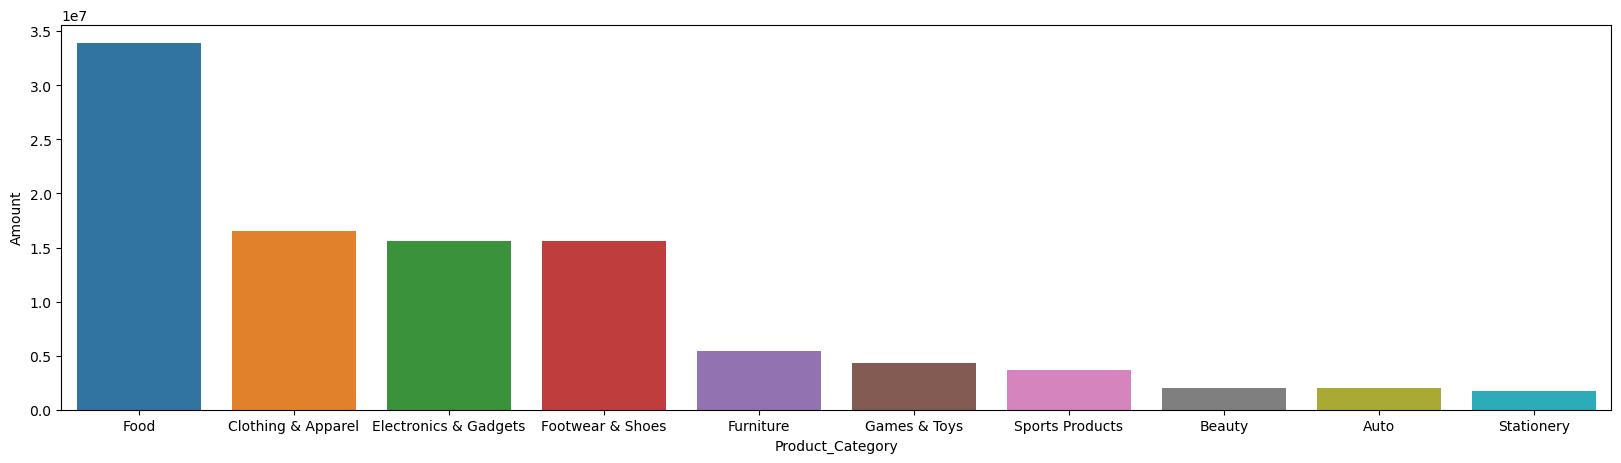

In [14]:
plt.figure(figsize=(20,5))
prod_sales = df.groupby(['Product_Category'])['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(10)
sns.barplot(data = prod_sales, x = 'Product_Category',y= 'Amount')
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

### Product_id vs Orders

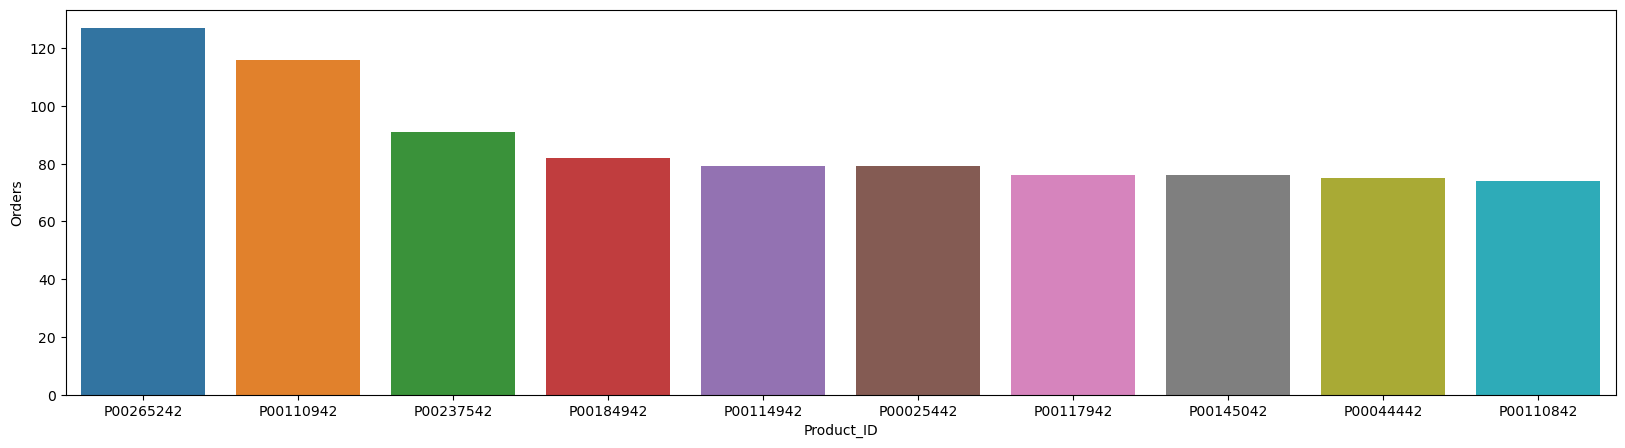

In [15]:
plt.figure(figsize=(20,5))
prod_orders = df.groupby(['Product_ID'])['Orders'].sum().reset_index().sort_values('Orders', ascending=False).head(10)
sns.barplot(data = prod_orders, x = 'Product_ID',y= 'Orders')
plt.show()

From above graph we can see that most of the sold products are of the productid = POO265242

### Zone vs Orders

In [19]:
zone_orders = df.groupby(['Zone'])['Orders'].sum().reset_index().sort_values('Orders', ascending=False).head(10)

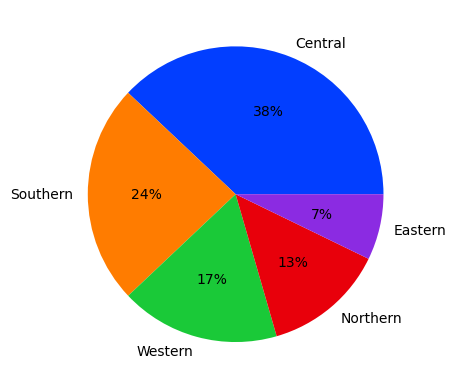

In [20]:
palette_color = sns.color_palette('bright')
  # plotting data on chart
plt.pie(zone_orders['Orders'], labels=zone_orders['Zone'], colors=palette_color, autopct='%.0f%%')
  # displaying chart
plt.show()

From above graph we can see that 38% of the orders were from the Central Region

## The Insights:

#### Most of the sales are generated from prople who are:

- Married females

- age group 26-35 yrs 
 
- from UP,  Maharastra and Karnataka 

- from Central Zone

- working in IT, Healthcare and Aviation

- they buy products from Food, Clothing and Electronics category